In [1]:
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import gabor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import cv2
import fnmatch
from skimage.feature import local_binary_pattern
from scipy.stats import itemfreq
from sklearn.preprocessing import normalize
import PIL
import seaborn as sns
from scikitplot.metrics import plot_roc_curve
%matplotlib inline

In [2]:
x = np.load('C:/Users/Debanjan Bhadra/Desktop/project/x_BreakHis_40_manual_extracted_features.npy')
y = np.load('C:/Users/Debanjan Bhadra/Desktop/project/y_BreakHis_40.npy')

In [3]:
df = pd.DataFrame(x, columns=['lbp_energy','lbp_entropy','greycomatrix','contrast','dissimilarity','homogeneity','feat_glcm','gabor_energy','gabor_entropy'])
df['target_label'] =y
df.tail()

,lbp_energy,lbp_entropy,greycomatrix,contrast,dissimilarity,homogeneity,feat_glcm,gabor_energy,gabor_entropy,target_label
5980,0.147804,2.782129,3045.413984,40.498001,0.067396,0.032394,0.247491,0.144598,2.893294,7
5981,0.147452,2.783693,2514.905183,36.247413,0.079894,0.040007,0.389172,0.146564,2.883310,7
5982,0.150489,2.768175,1752.155040,26.888664,0.259491,0.203550,0.621807,0.202296,2.667552,7
5983,0.150066,2.771233,1219.490592,22.429929,0.269557,0.214963,0.543637,0.184123,2.742553,7
5984,0.145886,2.791944,2066.302895,31.949822,0.090659,0.044320,0.393824,0.138207,2.927135,7


c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


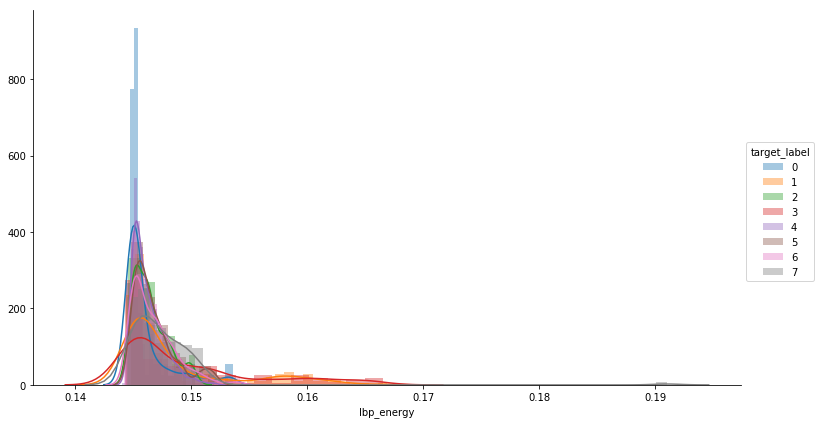

In [4]:
sns.FacetGrid(df,hue='target_label',size=6, aspect = 1.75).map(sns.distplot, 'lbp_energy').add_legend();

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


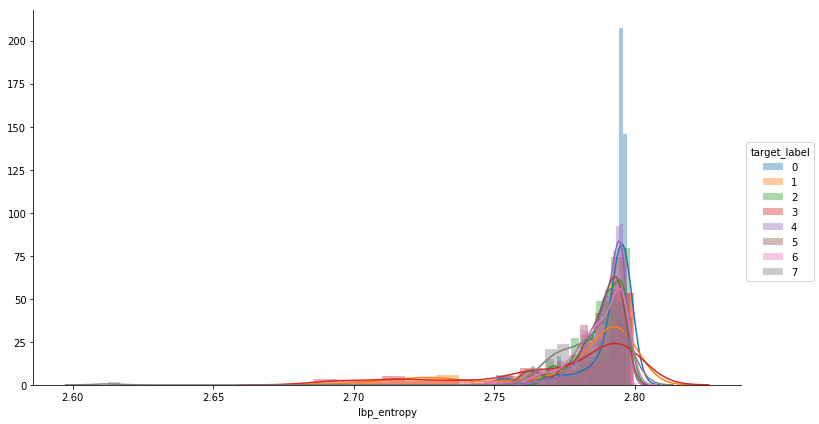

In [5]:
sns.FacetGrid(df,hue='target_label',size=6, aspect = 1.75).map(sns.distplot, 'lbp_entropy').add_legend();

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


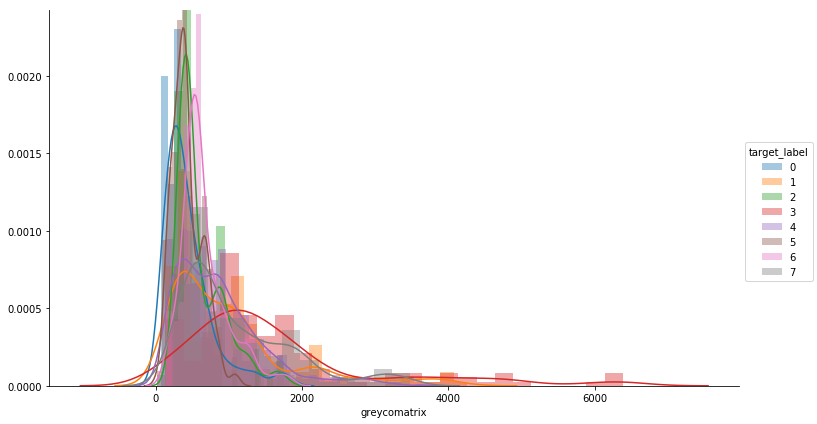

In [6]:
sns.FacetGrid(df,hue='target_label',size=6, aspect = 1.75).map(sns.distplot, 'greycomatrix').add_legend();

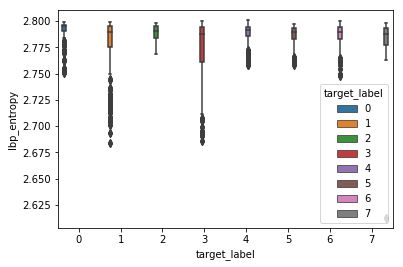

In [7]:
sns.boxplot(x=df['target_label'],y=df['lbp_entropy'],hue=df['target_label']);

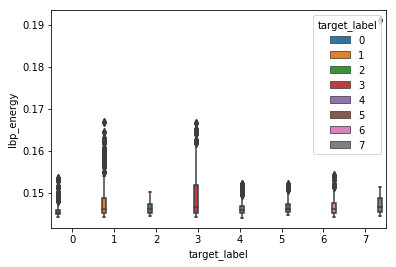

In [8]:
sns.boxplot(x=df['target_label'],y=df['lbp_energy'],hue=df['target_label']);

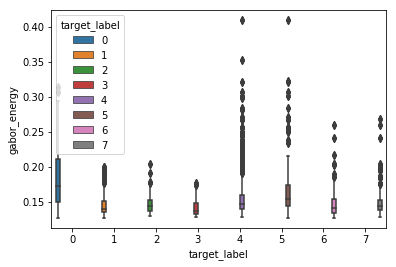

In [9]:
sns.boxplot(x=df['target_label'],y=df['gabor_energy'],hue=df['target_label']);

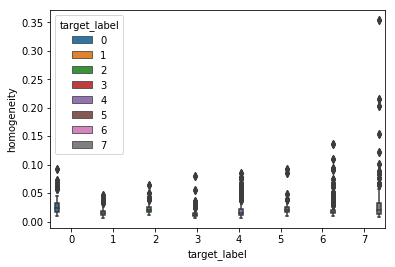

In [10]:
sns.boxplot(x=df['target_label'],y=df['homogeneity'],hue=df['target_label']);

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.grid(b=False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        74
          1       0.00      0.00      0.00       140
          2       0.00      0.00      0.00        66
          3       0.47      0.20      0.28        92
          4       0.45      0.99      0.62       523
          5       0.00      0.00      0.00        99
          6       1.00      0.03      0.05       118
          7       0.00      0.00      0.00        85

avg / total       0.33      0.45      0.30      1197

0.4519632414369256


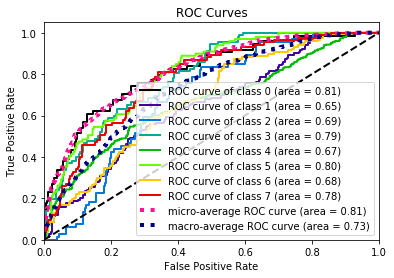

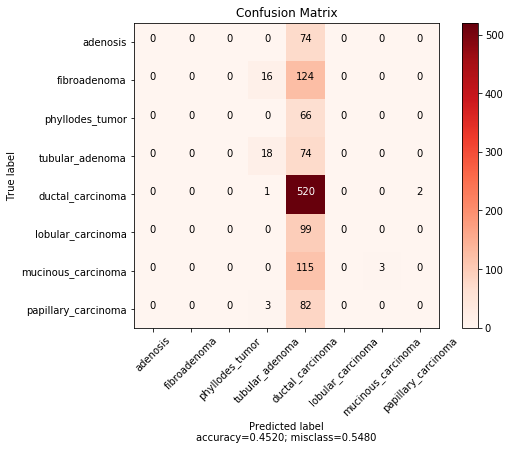

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
plot_roc_curve(y_test,lg.predict_proba(x_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

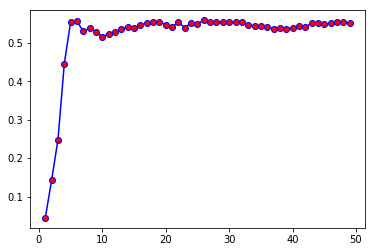

In [15]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append((pred!=y_test).sum()/len(pred))
error
xx = np.array(range(1,50))
plt.plot(xx,error,marker='o',color='b',markerfacecolor='r');

             precision    recall  f1-score   support

          0       0.96      0.88      0.92        74
          1       0.98      0.98      0.98       140
          2       1.00      0.95      0.98        66
          3       0.97      1.00      0.98        92
          4       0.95      0.97      0.96       523
          5       0.85      0.86      0.85        99
          6       1.00      0.97      0.99       118
          7       1.00      0.93      0.96        85

avg / total       0.96      0.96      0.96      1197

0.9557226399331662


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


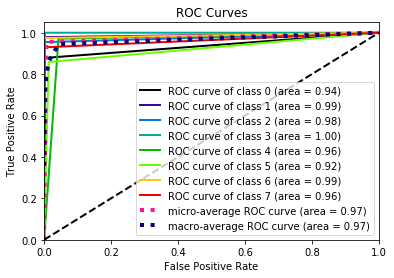

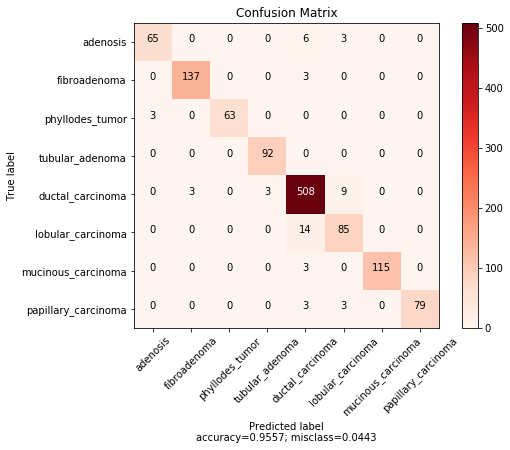

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,knn.predict_proba(x_test))
#plot_roc_curve(y_test,lg.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       0.23      0.31      0.26        74
          1       0.16      0.04      0.07       140
          2       0.12      0.55      0.19        66
          3       0.26      0.35      0.30        92
          4       0.57      0.49      0.53       523
          5       0.19      0.19      0.19        99
          6       0.19      0.11      0.14       118
          7       0.57      0.05      0.09        85

avg / total       0.38      0.33      0.32      1197

0.3258145363408521


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


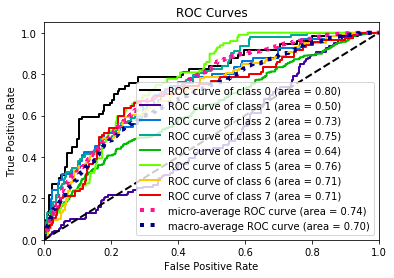

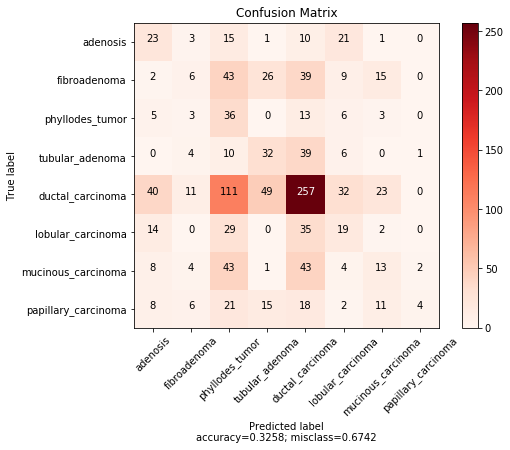

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,gnb.predict_proba(x_test))
#plot_roc_curve(y_test,lg.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        74
          1       1.00      1.00      1.00       140
          2       0.91      0.95      0.93        66
          3       1.00      1.00      1.00        92
          4       0.96      0.97      0.96       523
          5       0.81      0.80      0.81        99
          6       0.97      0.97      0.97       118
          7       1.00      0.96      0.98        85

avg / total       0.96      0.96      0.96      1197

0.9582289055973267


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


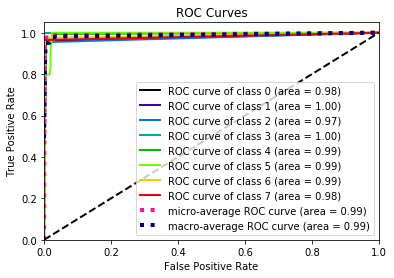

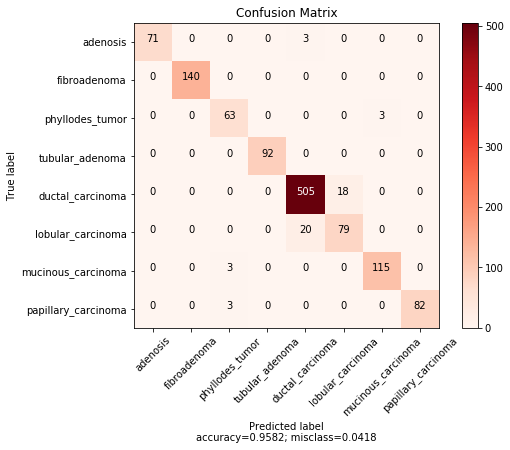

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,dtc.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       0.96      0.92      0.94        74
          1       0.99      1.00      0.99       140
          2       1.00      0.92      0.96        66
          3       1.00      0.98      0.99        92
          4       0.94      0.97      0.96       523
          5       0.83      0.80      0.81        99
          6       1.00      0.97      0.99       118
          7       1.00      1.00      1.00        85

avg / total       0.96      0.96      0.96      1197

0.9573934837092731


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


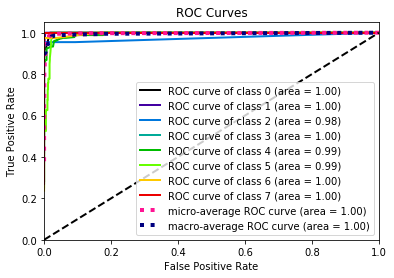

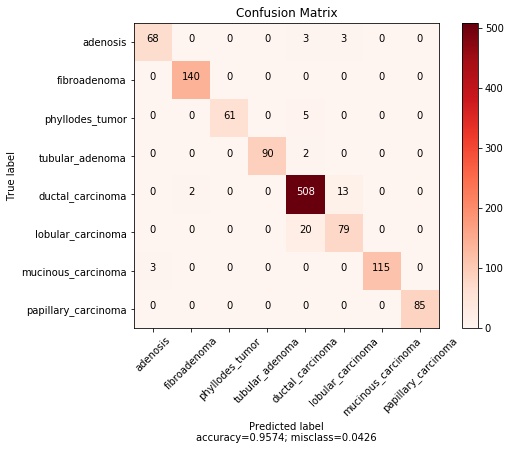

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
#plot_roc_curve(y_test,lg.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names =['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


             precision    recall  f1-score   support

          0       0.55      0.22      0.31        74
          1       0.28      0.14      0.19       140
          2       0.00      0.00      0.00        66
          3       0.38      0.14      0.21        92
          4       0.48      0.89      0.63       523
          5       0.33      0.13      0.19        99
          6       0.25      0.03      0.05       118
          7       0.33      0.16      0.22        85

avg / total       0.38      0.46      0.37      1197

0.45614035087719296


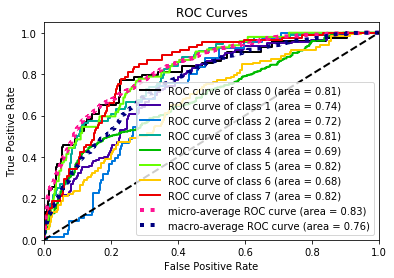

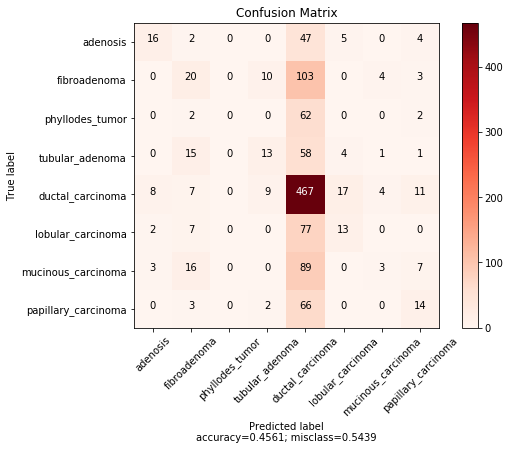

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
#plot_roc_curve(y_test,lg.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       0.56      0.39      0.46        74
          1       0.27      0.27      0.27       140
          2       0.21      0.68      0.33        66
          3       0.44      0.30      0.36        92
          4       0.67      0.62      0.64       523
          5       0.34      0.62      0.44        99
          6       0.41      0.17      0.24       118
          7       0.55      0.13      0.21        85

avg / total       0.51      0.46      0.46      1197

0.46365914786967416


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


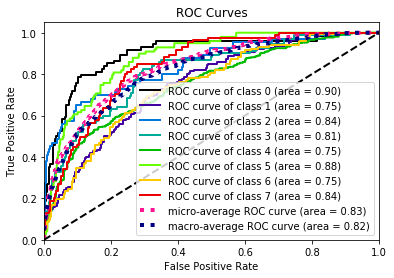

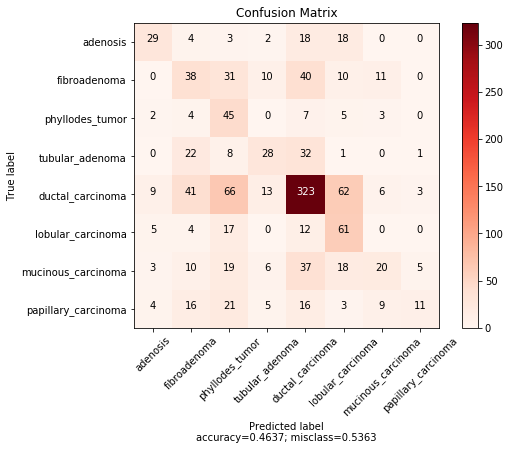

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
#plot_roc_curve(y_test,lg.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       0.62      0.50      0.55        74
          1       0.72      0.73      0.73       140
          2       0.58      0.39      0.47        66
          3       0.91      0.85      0.88        92
          4       0.75      0.85      0.80       523
          5       0.50      0.51      0.50        99
          6       0.79      0.65      0.72       118
          7       0.90      0.73      0.81        85

avg / total       0.73      0.73      0.73      1197

0.733500417710944


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


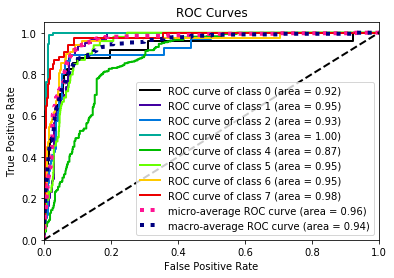

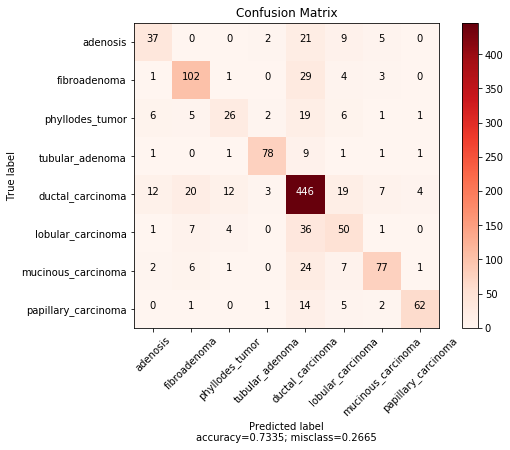

In [22]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       0.30      0.28      0.29        74
          1       0.32      0.13      0.18       140
          2       0.12      0.06      0.08        66
          3       0.28      0.45      0.34        92
          4       0.50      0.70      0.59       523
          5       0.28      0.11      0.16        99
          6       0.35      0.19      0.24       118
          7       0.38      0.25      0.30        85

avg / total       0.39      0.42      0.38      1197

0.4227234753550543


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


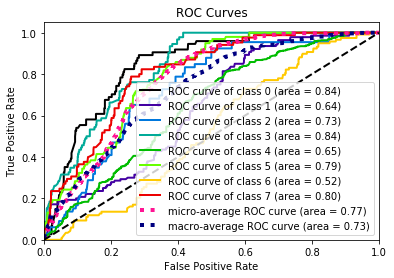

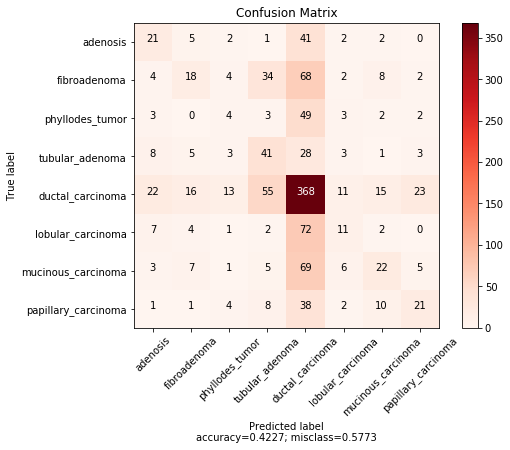

In [23]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names =  ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       0.96      0.89      0.92        74
          1       0.97      0.99      0.98       140
          2       0.95      0.95      0.95        66
          3       0.97      1.00      0.98        92
          4       0.95      0.97      0.96       523
          5       0.83      0.80      0.81        99
          6       0.97      0.96      0.96       118
          7       1.00      0.94      0.97        85

avg / total       0.95      0.95      0.95      1197

0.9490392648287385


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


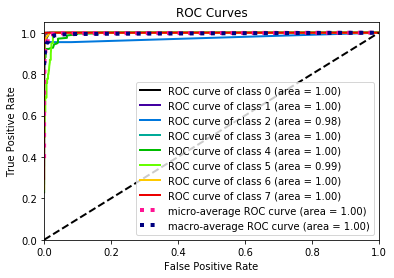

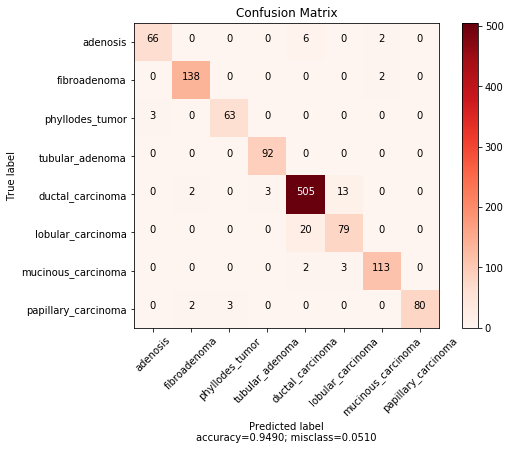

In [24]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       0.95      0.73      0.82        74
          1       0.92      0.84      0.88       140
          2       0.92      0.67      0.77        66
          3       0.95      0.67      0.79        92
          4       0.71      0.95      0.81       523
          5       0.80      0.44      0.57        99
          6       0.86      0.55      0.67       118
          7       0.88      0.72      0.79        85

avg / total       0.81      0.79      0.78      1197

0.7886382623224728


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


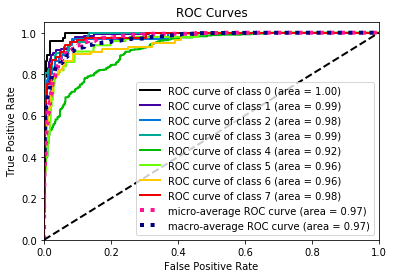

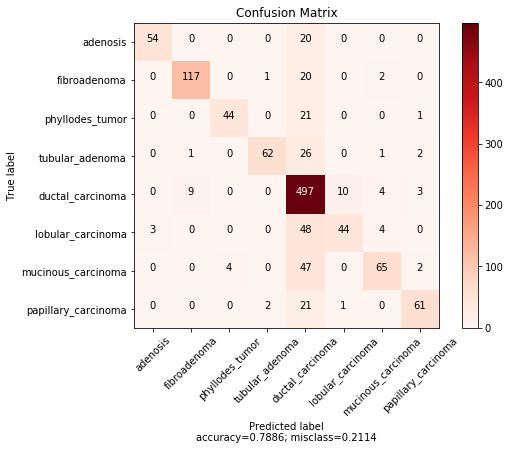

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       1.00      0.92      0.96        74
          1       1.00      1.00      1.00       140
          2       0.95      0.95      0.95        66
          3       1.00      1.00      1.00        92
          4       0.95      0.97      0.96       523
          5       0.81      0.80      0.81        99
          6       1.00      0.97      0.99       118
          7       1.00      0.96      0.98        85

avg / total       0.96      0.96      0.96      1197

0.9582289055973267


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


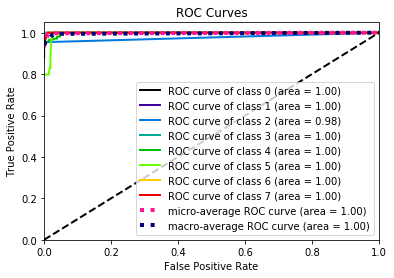

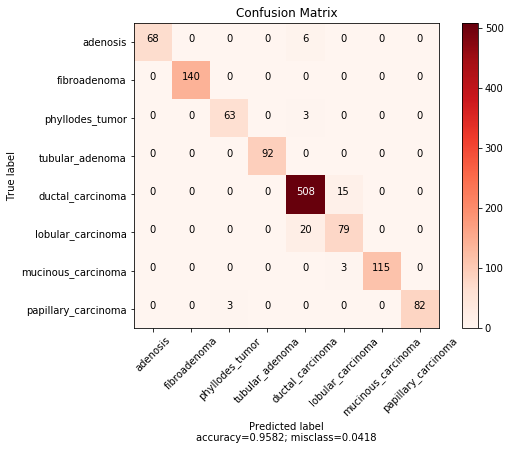

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

c:\program files\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        74
          1       0.00      0.00      0.00       140
          2       0.00      0.00      0.00        66
          3       0.00      0.00      0.00        92
          4       0.44      1.00      0.61       523
          5       0.00      0.00      0.00        99
          6       0.00      0.00      0.00       118
          7       0.00      0.00      0.00        85

avg / total       0.19      0.44      0.27      1197

0.4369256474519632


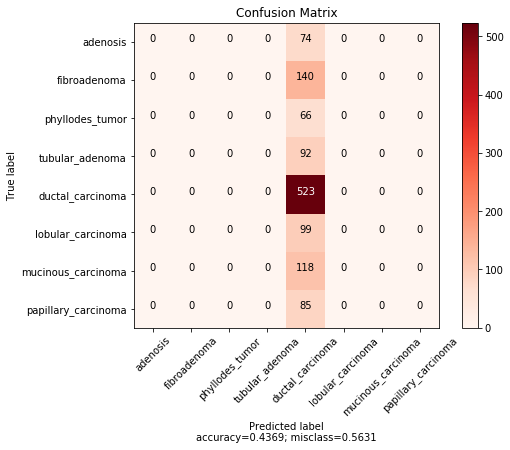

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#plot_roc_curve(y_test,clf.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        74
          1       0.00      0.00      0.00       140
          2       0.00      0.00      0.00        66
          3       0.29      0.22      0.25        92
          4       0.45      0.95      0.61       523
          5       0.00      0.00      0.00        99
          6       0.00      0.00      0.00       118
          7       0.25      0.01      0.02        85

avg / total       0.23      0.43      0.29      1197

0.4344193817878028


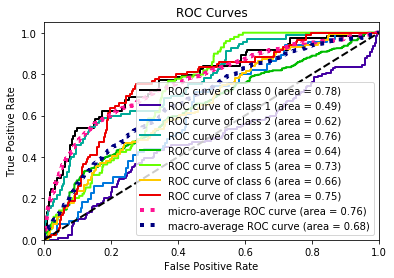

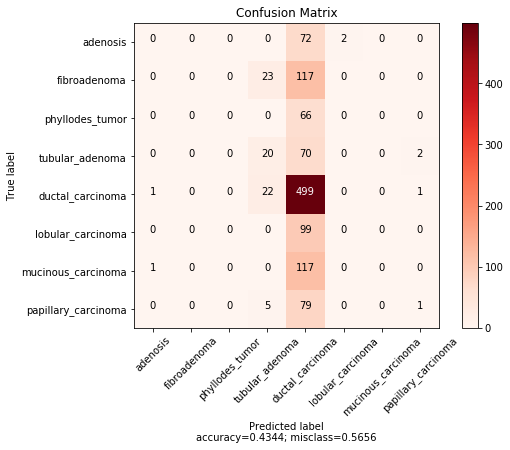

In [28]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")

             precision    recall  f1-score   support

          0       1.00      0.88      0.94        74
          1       1.00      0.98      0.99       140
          2       1.00      0.95      0.98        66
          3       1.00      1.00      1.00        92
          4       0.93      0.97      0.95       523
          5       0.79      0.80      0.79        99
          6       1.00      0.97      0.99       118
          7       1.00      0.93      0.96        85

avg / total       0.95      0.95      0.95      1197

0.9507101086048454


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


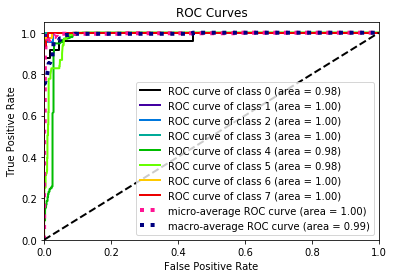

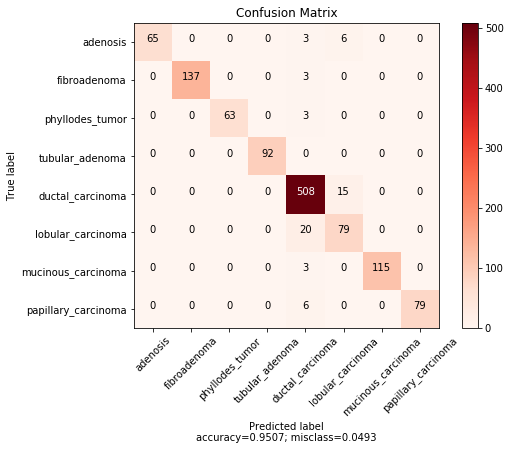

In [29]:
from sklearn.svm import SVC
clf = SVC(C=30, kernel = 'rbf', gamma = 2, tol=1e-1, probability=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plot_roc_curve(y_test,clf.predict_proba(x_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma', 'ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'],
                      title        = "Confusion Matrix")